<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_3_style_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 7: Generative Adversarial Networks**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 7 Material

* Part 7.1: Introduction to GANS for Image and Data Generation [[Video]](https://www.youtube.com/watch?v=0QnCH6tlZgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_1_gan_intro.ipynb)
* Part 7.2: Implementing a GAN in Keras [[Video]](https://www.youtube.com/watch?v=T-MCludVNn4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_2_Keras_gan.ipynb)
* **Part 7.3: Face Generation with StyleGAN and Python** [[Video]](https://www.youtube.com/watch?v=Wwwyr7cOBlU&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_3_style_gan.ipynb)
* Part 7.4: GANS for Semi-Supervised Learning in Keras [[Video]](https://www.youtube.com/watch?v=ZPewmEu7644&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_4_gan_semi_supervised.ipynb)
* Part 7.5: An Overview of GAN Research [[Video]](https://www.youtube.com/watch?v=cvCvZKvlvq4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_5_gan_research.ipynb)


## Warning: This Module Requires TensorFlow 1.x

This module makes use of the nVidia StyleGAN2 package.  Neither StyleGAN 1.0 nor StyleGAN 2.0 currently supports TensorFlow 2.0.  Because of this incompatibility, it will be necessary to run this code with an older version of TensorFlow.  Running this notebook in this way is easiest with Google CoLab.  Because of this, I designed this module to run in Google CoLab.  It will take some modifications to if you wish to run it locally.

Also, note that this module uses StyleGAN 1.0, I will soon update to 2.0.

# Part 7.3: Face Generation with StyleGAN and Python

GANs have appeared frequently in the media, showcasing their ability to generate extremely photorealistic faces.  One significant step forward for realistic face generation was nVidia StyleGAN. [[Cite:karras2019style]](https://arxiv.org/abs/1812.04948) In this module we will explore StyleGAN2, which is the second interation of this technology by nVidia. [[Cite:karras2019analyzing]](https://arxiv.org/abs/1912.04958) We will also preload weights that nVidia trained on.  This will allow us to generate high resolution photorealistic looking faces, such seen in Figure 7.STY-GAN.

**Figure 7.STY-GAN: StyleGAN2 Generated Faces**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2_images.jpg "StyleGAN2 Generated Faces")

The above images were generated with StyleGAN2, using Google CoLab.  Following the instructions in this section, you will be able to create faces like this of your own.  StyleGAN2 images are usually 1,024 x 1,024 in resolution.  An example of a full resolution StyleGAN image can be [found here](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-hires.jpg). 

While the above images look much more realistic than images generated earlier in this course, they are not perfect.  Look at Figure 7.STYLEGAN2. There are usually a number of tell-tail signs that you are looking at a computer generated image.  One of the most obvious is usually the surreal, dream-like backgrounds.  The background does not look obviously fake, at first glance; however, upon closer inspection you usually can't quite discern exactly what a GAN generated background actually is.  Also look at the image character's left eye.  It is slightly unrealistic looking, especially near the eyelashes.

Look at the following GAN face.  Can you spot any imperfections?

**Figure 7.STYLEGAN2: StyleGAN2 Face**
![StyleGAN2 Face](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_bad.jpg "StyleGAN2 Face")

* Image A demonstrates the very abstract backgrounds usually associated with a GAN generated image.
* Image B exhibits issues that earrings often present for GANs. GANs sometimes have problems with symmetry, particularly earrings.
* Image C contains an abstract background, as well as a highly distorted secondary image.
* Image D also contains a highly distorted secondary image that might be a hand.

There are a number of websites that allow you to generate GANs of your own without any software.

* [This Person Does not Exist](https://www.thispersondoesnotexist.com/)
* [Which Face is Real](http://www.whichfaceisreal.com/)

The first site generates high resolution images of human faces.  The second site presents a quiz to see if you can detect the difference between a real and fake human faceimage.

In this module you will learn to create your own StyleGAN2 pictures using Python.

### Keras Sequence vs Functional Model API

Most of the neural networks create in this course have made use of the Keras sequence object.  You might have noticed that we briefly made use of another type of neural network object for the ResNet, the Model.  These are the [two major means](https://keras.io/getting-started/functional-api-guide/) of constructing a neural network in Keras:

* [Sequential](https://keras.io/getting-started/sequential-model-guide/) - Simplified interface to Keras that supports most models where the flow of information is a simple sequence from input to output. 
* [Keras Functional API](https://keras.io/getting-started/functional-api-guide/) - More complex interface that allows neural networks to be constructed of reused layers, multiple input layers, and supports building your own recurrent connections.

It is important to point out that these are not two specific types of neural network.  Rather, they are two means of constructing neural networks in Keras.  Some types of neural network can be implemented in either, such as dense feedforward neural networks (like we used for the Iris and MPG datasets).  However, other types of neural network, like ResNet and GANs can only be used in the Functional Model API.

### Generating High Rez GAN Faces with Google CoLab

This notebook demonstrates how to run [NVidia StyleGAN2](https://github.com/NVlabs/stylegan) inside of a Google CoLab notebook.  I suggest you use this to generate GAN faces from a pretrained model.  If you try to train your own, you will run into compute limitations of Google CoLab.

Make sure to run this code on a GPU instance.  GPU is assumed.

First, map your G-Drive, this is where your GANs will be written to.

In [1]:
# Run this for Google CoLab (use TensorFlow 1.x)
%tensorflow_version 1.x|
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x|`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
Mounted at /content/drive


Next, clone StyleGAN2 from GitHub.

In [2]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 122, done.
remote: Total 122 (delta 0), reused 0 (delta 0), pack-reused 122
Receiving objects: 100% (122/122), 590.23 KiB | 838.00 KiB/s, done.
Resolving deltas: 100% (55/55), done.


Verify that StyleGAN has been cloned.

In [3]:
!ls /content/stylegan2/

dataset_tool.py  LICENSE.txt		 README.md	   run_training.py
dnnlib		 metrics		 run_generator.py  test_nvcc.cu
Dockerfile	 pretrained_networks.py  run_metrics.py    training
docs		 projector.py		 run_projector.py


# Run StyleGan2 From Command Line

Add the StyleGAN folder to Python so that you can import it.  The code below is based on code from NVidia. This actually generates your images.

In [4]:
!python /content/stylegan2/run_generator.py generate-images \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --seeds=6600-6625 --truncation-psi=0.5

Local submit - run_dir: results/00000-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 6600 (0/26) ...
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 661

In [5]:
!ls /content/results/00000-generate-images

_finished.txt  seed6604.png  seed6611.png  seed6618.png  seed6625.png
log.txt        seed6605.png  seed6612.png  seed6619.png  submit_config.pkl
run.txt        seed6606.png  seed6613.png  seed6620.png  submit_config.txt
seed6600.png   seed6607.png  seed6614.png  seed6621.png
seed6601.png   seed6608.png  seed6615.png  seed6622.png
seed6602.png   seed6609.png  seed6616.png  seed6623.png
seed6603.png   seed6610.png  seed6617.png  seed6624.png


In [ ]:
cp /content/results/00000-generate-images/* \
    /content/drive/My\ Drive/projects/stylegan2

In [ ]:
!python /content/stylegan2/run_generator.py style-mixing-example \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --row-seeds=85,100,75,458,1500 --col-seeds=55,821,1789,293 \
    --truncation-psi=1.0

Local submit - run_dir: results/00001-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 46s.


# Run StyleGAN2 From Python Code

Add the StyleGAN folder to Python so that you can import it.  The code below is based on code from NVidia. This actually generates your images.

In [ ]:
import sys
sys.path.insert(0, "/content/stylegan2")

import dnnlib

In [ ]:
# Copyright (c) 2019, NVIDIA Corporation. All rights reserved.
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, visit
# https://nvlabs.github.io/stylegan2/license.html

import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys

import pretrained_networks

#----------------------------------------------------------------------------

def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) ) 
  return result

def generate_images(Gs, seeds, truncation_psi):
    noise_vars = [var for name, var in \
                  Gs.components.synthesis.vars.items() \
                  if name.startswith('noise')]

    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func= \
        tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if truncation_psi is not None:
        Gs_kwargs.truncation_psi = truncation_psi

    for seed_idx, seed in enumerate(seeds):
        print('Generating image for seed %d/%d ...' % (seed_idx, len(seeds)))
        rnd = np.random.RandomState()
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) \
                        for var in noise_vars}) # [height, width]
        images = Gs.run(seed, None, **Gs_kwargs) 
        # [minibatch, height, width, channel]
        path = f"/content/drive/My Drive/projects/"+\
                f"stylegan2/image{seed_idx}.png"
        PIL.Image.fromarray(images[0], 'RGB').save(path)

def main():
    sc = dnnlib.SubmitConfig()
    sc.num_gpus = 1
    sc.submit_target = dnnlib.SubmitTarget.LOCAL
    sc.local.do_not_copy_source_files = True
    sc.run_dir_root = "/content/drive/My Drive/projects/stylegan2"
    sc.run_desc = 'generate-images'
    network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'

    print('Loading networks from "%s"...' % network_pkl)
    _G, _D, Gs = pretrained_networks.load_networks(network_pkl)
    vector_size = Gs.input_shape[1:][0]
    seeds = expand_seed( range(8000,8020), vector_size)
    generate_images(Gs, seeds,truncation_psi=0.5)

#----------------------------------------------------------------------------

if __name__ == "__main__":
    main()

#----------------------------------------------------------------------------

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


KeyboardInterrupt: ignored

In [ ]:
indexes = open('/content/drive/MyDrive/projects/stylegan2/indexes.txt', 'r').readlines()

In [ ]:
network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'

print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
vector_size = Gs.input_shape[1:][0]

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...


In [ ]:
indexes[2]

'6602 1\n'

In [ ]:
bis = list()
nis = list()

for i in indexes:
  if len(i.split(' ')) > 1:
    bis.append(int(i.split(' ')[0]))
  else:
    nis.append(int(i.split(' ')[0]))

len(bis), len(nis)

(27, 28)

In [ ]:
bs = expand_seed(bis, vector_size)
ns = expand_seed(nis, vector_size)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

X_data = list([*bs, *ns])
y_beard_data = [1]*len(bs) + [0]*len(ns)

In [ ]:
X_data = [x[0] for x in X_data]

In [ ]:



clf = LogisticRegression(class_weight='balanced').fit(X_data, y_beard_data)
beard_direction = clf.coef_.reshape((1, 512))

# So yep, that's all. We made it.
# But let's do some research first. We'll pick that up later on.

In [ ]:
means = list()

for b in bs:
  for n in ns:
    means.append(b - n)

shift = np.mean(means, 0)

In [ ]:
def generate_image(Gs, seed, truncation_psi):
    noise_vars = [var for name, var in \
                  Gs.components.synthesis.vars.items() \
                  if name.startswith('noise')]

    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func= \
        tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if truncation_psi is not None:
        Gs_kwargs.truncation_psi = truncation_psi

    print('Generating image ...')
    rnd = np.random.RandomState()
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) \
                    for var in noise_vars}) # [height, width]
    images = Gs.run(seed[0], None, **Gs_kwargs) 
    return PIL.Image.fromarray(images[0], 'RGB')

# STEPS = 300
# diff = seeds[1] - seeds[0]
# step = diff / STEPS
# current = seeds[0].copy()

# seeds2 = []
# for i in range(STEPS):
#   seeds2.append(current)
#   current = current + step

# generate_images(Gs, seeds2,truncation_psi=0.5)

Generating image ...


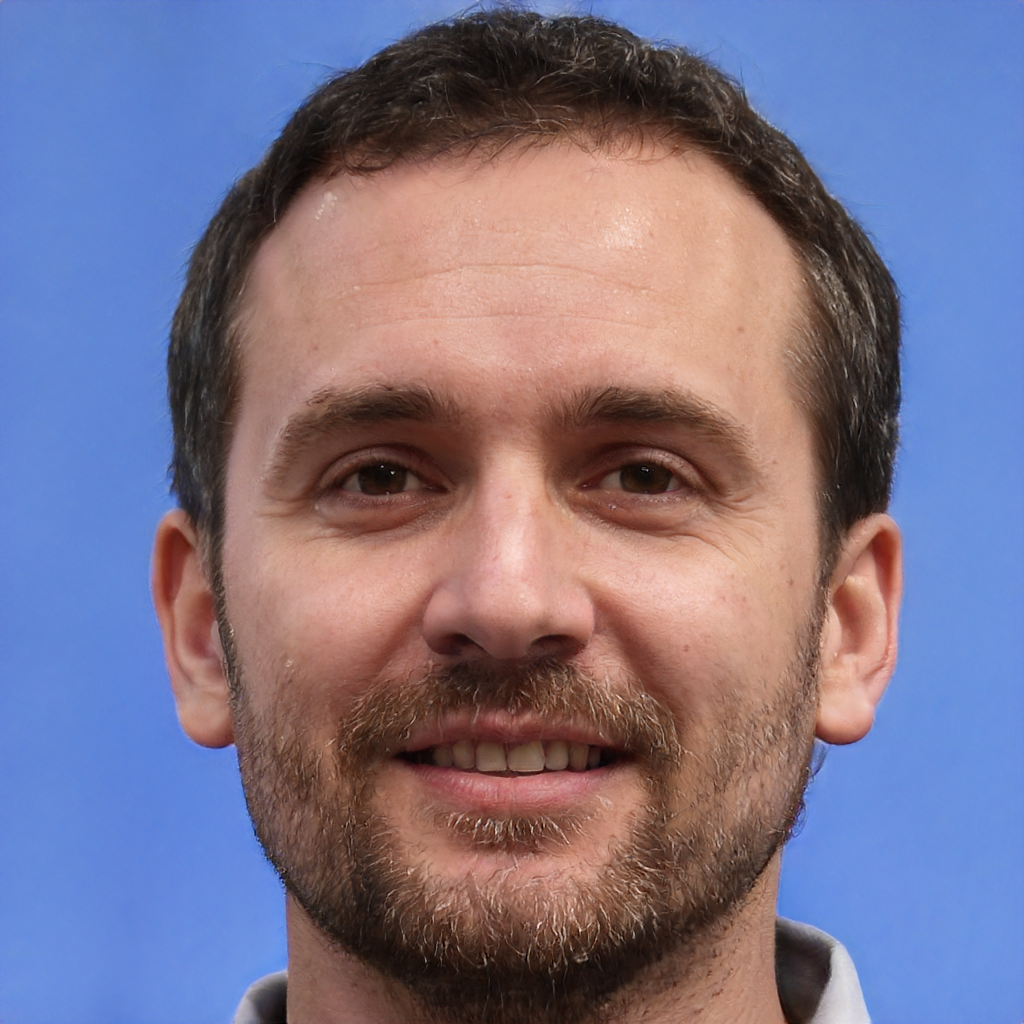

In [ ]:
seed = expand_seed( [nis[14]], vector_size)
seed[0] += 5*beard_direction
generate_image(Gs, seed, truncation_psi=0.5)

## Examining the Latent Vector

Figure 7.LVEC shows the effects of transforming the latent vector between two images.

**Figure 7.LVEC: Transforming the Latent Vector**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_progression.jpg "GAN")

In [ ]:
sc = dnnlib.SubmitConfig()
sc.num_gpus = 1
sc.submit_target = dnnlib.SubmitTarget.LOCAL
sc.local.do_not_copy_source_files = True
sc.run_dir_root = "/content/drive/My Drive/projects/stylegan2"
sc.run_desc = 'generate-images'
network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'

print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
vector_size = Gs.input_shape[1:][0]
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
(1, 512)


In [ ]:
# 8192+1,8192+9

STEPS = 300
diff = seeds[1] - seeds[0]
step = diff / STEPS
current = seeds[0].copy()

seeds2 = []
for i in range(STEPS):
  seeds2.append(current)
  current = current + step

generate_images(Gs, seeds2,truncation_psi=0.5)

Generating image for seed 0/300 ...
Generating image for seed 1/300 ...
Generating image for seed 2/300 ...
Generating image for seed 3/300 ...
Generating image for seed 4/300 ...
Generating image for seed 5/300 ...
Generating image for seed 6/300 ...
Generating image for seed 7/300 ...
Generating image for seed 8/300 ...
Generating image for seed 9/300 ...
Generating image for seed 10/300 ...
Generating image for seed 11/300 ...
Generating image for seed 12/300 ...
Generating image for seed 13/300 ...
Generating image for seed 14/300 ...
Generating image for seed 15/300 ...
Generating image for seed 16/300 ...
Generating image for seed 17/300 ...
Generating image for seed 18/300 ...
Generating image for seed 19/300 ...
Generating image for seed 20/300 ...
Generating image for seed 21/300 ...
Generating image for seed 22/300 ...
Generating image for seed 23/300 ...
Generating image for seed 24/300 ...
Generating image for seed 25/300 ...
Generating image for seed 26/300 ...
Generating 

You might wish to view these generate images as a video file.  The command line utility **ffmpeg** can be used to combine these images into a video.  The following command could be used to create this video.  You will usually have to install **ffmpeg** for the particular operating system that you are running.  Refer to the [ffmpeg](https://ffmpeg.org/) website for more details on installation.
```
ffmpeg -r 30 -i image%d.png -vcodec mpeg4 -y movie.mp4
```